Libraries for AI

In [128]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df =pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
#MCAR-missing completely ar random
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [133]:
#missing not at random(MNAR)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [134]:
#MAR-missing at random


All the techniques for handling missing values

1.Mean/meadian/mode replcement


In [135]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [136]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [138]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [139]:
median=df.Age.median()
median

28.0

In [140]:
df['Age_median']= df['Age'].fillna(median)

In [141]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [142]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [143]:
df['Age'].to_list()

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 nan,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 nan,
 31.0,
 nan,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 nan,
 19.0,
 nan,
 nan,
 40.0,
 nan,
 nan,
 66.0,
 28.0,
 42.0,
 nan,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 nan,
 3.0,
 19.0,
 nan,
 nan,
 nan,
 nan,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 nan,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 nan,
 nan,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 nan,
 nan,
 0.83,
 30.0,
 22.0,
 29.0,
 nan,
 28.0,
 17.0,
 33.0,
 16.0,
 nan,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 nan,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 nan,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 nan,
 38.0,
 nan,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 nan,
 32.5,
 32.5,
 54.0,
 12.0,
 nan,
 24.0,
 nan,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 nan,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36

In [144]:
len(df['Age'].to_list())

891

In [145]:
df['Age'].median()

28.0

In [146]:
df['Age_median'].median()

28.0

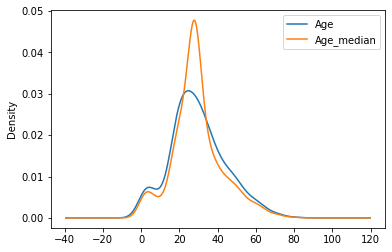

In [147]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)

df['Age'].plot(kind="kde")
df['Age_median'].plot(kind='kde')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

plt.show()

Advantages and disadvantages of mean/meadian imputation
advantage:
1.easy to implrement
2.faster way to obtain the complete dataset
disadvantage:


In [148]:
# Creating the new feature with respect to Median
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [149]:
median=df.Age.median()
median

28.0

In [150]:
impute_nan(df,'Age',median)

In [151]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


#### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [152]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [153]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [154]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [156]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [157]:
df['Age'].dropna().sample()

685    25.0
Name: Age, dtype: float64

In [158]:
df['Age'].isnull().sum()

177

In [159]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

595    36.0
699    42.0
94     59.0
167    45.0
321    27.0
       ... 
684    60.0
243    22.0
551    27.0
91     20.0
380    42.0
Name: Age, Length: 177, dtype: float64

In [160]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

659    58.0
620    27.0
534    30.0
348     3.0
60     22.0
       ... 
151    22.0
197    42.0
430    28.0
679    36.0
446    13.0
Name: Age, Length: 177, dtype: float64

In [161]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [162]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [163]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [164]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [165]:
df.loc[859]

Survived    0.0000
Age            NaN
Fare        7.2292
Name: 859, dtype: float64

In [166]:
df.loc[31]

Survived      1.0000
Age              NaN
Fare        146.5208
Name: 31, dtype: float64

In [167]:
random_sample.index = df[df['Age'].isnull()].index

In [168]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [169]:
df.loc[df['Age'].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [170]:
df[df['Age'].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [171]:
df.loc[df['Age'].isnull(),'Age'] = random_sample

In [172]:
df[df['Age'].isnull()]

,Survived,Age,Fare


In [173]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,15.0,23.4500
889,1,26.0,30.0000


In [174]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [175]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [176]:
median=df.Age.median()
impute_nan(df,"Age",median)

In [177]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,15.0,23.4500,15.0,15.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:ylabel='Density'>

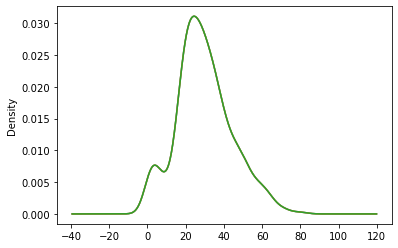

In [178]:
df['Age'].plot(kind="kde")
df['Age_median'].plot(kind='kde')
df['Age_random'].plot(kind='kde')

#wrong grpah-chechk video of 23/04/2022

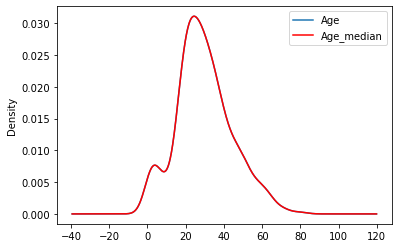

In [179]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde',color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#wrong grpah-chechk video of 23/04/2022

##### 3.  Capturing NAN values with a new feature

By this Approch we will get tyhe importance of the missing value

It works well if the data are not missing completely at random 

In [180]:
import pandas as pd
import numpy as np

In [181]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [182]:
 np.where(df['Age'].isnull(),1,0)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [183]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [184]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df['Age'].fillna(df.Age.median(),inplace=True)

In [188]:
df["Age_NAN"].value_counts()

0    714
1    177
Name: Age_NAN, dtype: int64

In [186]:
df


,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


#### 4. End of Distribution imputation

In [189]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

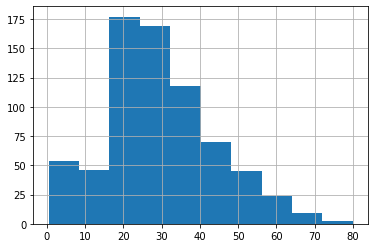

In [190]:
df.Age.hist()

<AxesSubplot:>

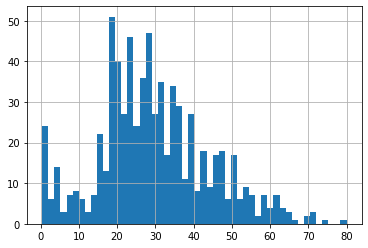

In [191]:
df.Age.hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

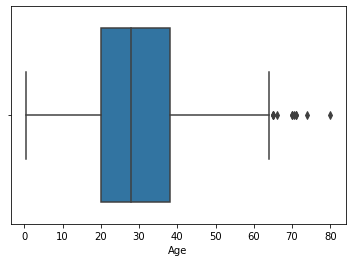

In [192]:
import seaborn as sns
sns.boxplot('Age',data=df)


In [193]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [194]:
df['Age'].mean()

29.69911764705882

In [195]:
df.Age.std()

14.526497332334044

In [196]:
df.Age.mean()+3*df.Age.std()

73.27860964406095

In [201]:
df['Age_extreme'] = df['Age'].fillna(extreme)

NameError: name 'extreme' is not defined

In [198]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [202]:
sns.boxplot('Age_extreme',data=df)


ValueError: Could not interpret input 'Age_extreme'

In [200]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_endOfDistribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_endOfDistribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

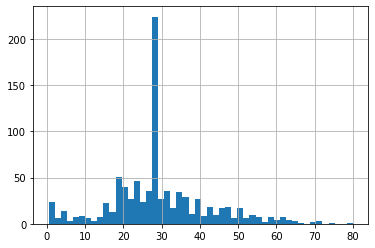

In [ ]:
df['Age'].hist(bins=50)

<AxesSubplot:>

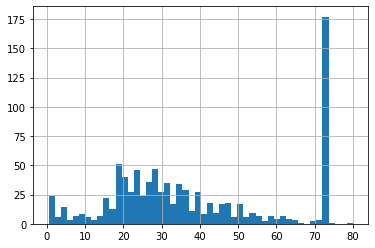

In [ ]:
df['Age_endOfDistribution'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_endOfDistribution'>

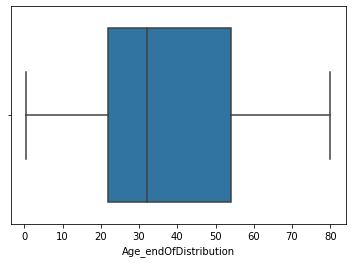

In [ ]:
sns.boxplot('Age_endOfDistribution',data=df)

##### How To Handle Categroical Missing Values

##### 6. Frequent Category Imputation

In [ ]:
import pandas as pd
df=pd.read_csv('loan.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.BsmtQual.mode()[0]

'TA'

In [ ]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
df.BsmtQual.mode()[0]

'TA'

<AxesSubplot:>

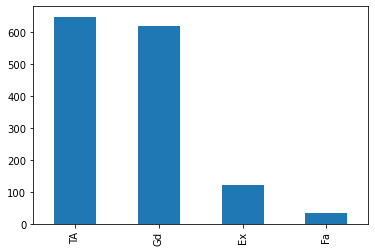

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

In [ ]:
df.GarageType.mode()[0]

'Attchd'

<AxesSubplot:>

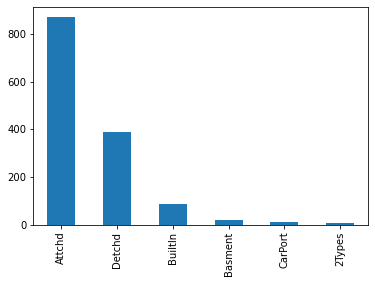

In [ ]:
df['GarageType'].value_counts().plot.bar()

In [ ]:
df.FireplaceQu.mode()[0]

'Gd'

<AxesSubplot:>

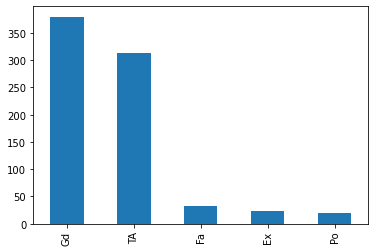

In [ ]:
df.FireplaceQu.value_counts().plot.bar()

In [ ]:
def impute_nan(df,variable):
    mf=df[variable].mode()[0]
    df[variable].fillna(mf,inplace=True)

In [ ]:
impute_nan(df,'FireplaceQu')

<AxesSubplot:>

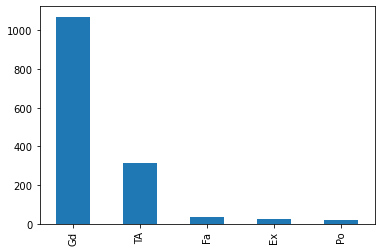

In [ ]:
df.FireplaceQu.value_counts().plot.bar()

In [ ]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.FireplaceQu.fillna("Others",inplace=True)

In [ ]:
df.isnull().sum()

BsmtQual       37
FireplaceQu     0
GarageType     81
SalePrice       0
dtype: int64

<AxesSubplot:>

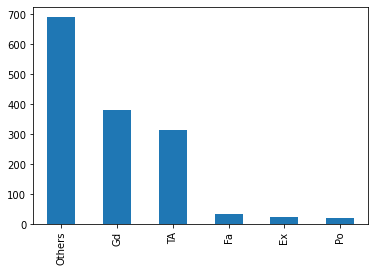

In [ ]:
df.FireplaceQu.value_counts().plot.bar()

## Handle Categorical Features

### Nominal Number Encoding

#### One Hot Encoding

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
pd.get_dummies(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
pd.get_dummies(df,columns=['Sex','Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [ ]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


#### Onehotencoding with many categories in a feature

In [ ]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [ ]:
#pd.get_dummies(df)

In [ ]:
for i in df.columns:
    print("For column",i,"the unique labels found is",len(df[i].unique()))

For column X0 the unique labels found is 47
For column X1 the unique labels found is 27
For column X2 the unique labels found is 44
For column X3 the unique labels found is 7
For column X4 the unique labels found is 4
For column X5 the unique labels found is 29
For column X6 the unique labels found is 12


In [ ]:
df['X0'].value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [ ]:
df['X0'].value_counts().sort_values(ascending=False).head(10).index

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [ ]:
lst10 =df['X0'].value_counts().sort_values(ascending=False).head(10).index

In [ ]:
lst10

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [ ]:
for i  in lst10:
    df[i]=np.where(df['X0']==i,1,0)

In [ ]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


### Ordinal Number Encoding

In [ ]:
import datetime #custome data set

In [ ]:
today_date=datetime.datetime.today()

In [ ]:
today_date

datetime.datetime(2022, 4, 27, 9, 44, 27, 449801)

In [ ]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [ ]:
days

[datetime.datetime(2022, 4, 27, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 26, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 25, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 24, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 23, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 22, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 21, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 20, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 19, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 18, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 17, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 16, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 15, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 14, 9, 44, 27, 449801),
 datetime.datetime(2022, 4, 13, 9, 44, 27, 449801)]

In [ ]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]
data.head()

,Day
0,2022-04-27 09:44:27.449801
1,2022-04-26 09:44:27.449801
2,2022-04-25 09:44:27.449801
3,2022-04-24 09:44:27.449801
4,2022-04-23 09:44:27.449801


In [ ]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2022-04-27 09:44:27.449801,Wednesday
1,2022-04-26 09:44:27.449801,Tuesday
2,2022-04-25 09:44:27.449801,Monday
3,2022-04-24 09:44:27.449801,Sunday
4,2022-04-23 09:44:27.449801,Saturday


In [ ]:
dictionary={'Monday':1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}

In [ ]:
data['weekday_ordinal']= data['weekday'].map(dictionary)

In [ ]:
data

,Day,weekday,weekday_ordinal
0,2022-04-27 09:44:27.449801,Wednesday,3
1,2022-04-26 09:44:27.449801,Tuesday,2
2,2022-04-25 09:44:27.449801,Monday,1
3,2022-04-24 09:44:27.449801,Sunday,7
4,2022-04-23 09:44:27.449801,Saturday,6
5,2022-04-22 09:44:27.449801,Friday,5
6,2022-04-21 09:44:27.449801,Thursday,4
7,2022-04-20 09:44:27.449801,Wednesday,3
8,2022-04-19 09:44:27.449801,Tuesday,2
9,2022-04-18 09:44:27.449801,Monday,1


#### Count Or Frequency Encoding

In [ ]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_set.shape

(32561, 15)

In [ ]:
# Droping the first column
train_set.drop(0,axis=1,inplace=True)

In [ ]:
train_set

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

In [ ]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
train_set.columns

Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')

In [ ]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [ ]:
train_set.columns

Index(['Employment', 'Degree', 'Status', 'Designation', 'family_job', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [ ]:
train_set.rename({'Status':'Status_1'},axis=1)#for rename a particular column

,Employment,Degree,Status_1,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
train_set['Employment'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
len(train_set['Employment'].unique())

9

In [ ]:
for feature in train_set.columns:
    print(feature,":",len(train_set[feature].unique()),"Labels")

Employment : 9 Labels
Degree : 16 Labels
Status : 7 Labels
Designation : 15 Labels
family_job : 6 Labels
Race : 5 Labels
Sex : 2 Labels
Country : 42 Labels


In [ ]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
Country_map = train_set['Country'].value_counts().to_dict()

In [ ]:
Country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

#### Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [203]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [204]:
df['Cabin'].fillna('Missing',inplace=True)

In [205]:
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [206]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [207]:
len(df.Cabin.unique())

148

In [208]:
df['Cabin'].astype(str).str[0].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [209]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [210]:
df

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [211]:
df.groupby(['Cabin'])['Survived'].mean().to_dict()

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [212]:
df

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [213]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [214]:
#dict----- key---->[T,M,A,G....]
#value---->[01234.......]
#o/p T:0,M:1......

In [215]:
# Dict ----- Key --->['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D']
#            value--->[0,1,2,3,4,5,6,7,8]

# output ---->
{'T':0,'M':1,'A':2,'G':3,'C':4,'F':5,'B':6,'E':7,'D':8}


{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [216]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [217]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [218]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [219]:
ordinal_labels#2nd method

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [220]:
dictNew={}
for i,k in enumerate(ordinal_labels):
#print(i)
#print(k)
    dictNew[k]=i
#print("======")

In [221]:
dictNew

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [222]:
dictNew={}
for i,k in enumerate(ordinal_labels,1):
    #print(i)
    #print(k)
    dictNew[k]=i


In [223]:
dictNew

{'T': 1, 'M': 2, 'A': 3, 'G': 4, 'C': 5, 'F': 6, 'B': 7, 'E': 8, 'D': 9}

#### Mean Encoding based on Target

In [224]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean()

In [225]:
mean_ordinal

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [230]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


In [231]:
df['Cabin'].map(mean_ordinal)


0      0.299854
1      0.593220
2      0.299854
3      0.593220
4      0.299854
         ...   
886    0.299854
887    0.744681
888    0.299854
889    0.593220
890    0.299854
Name: Cabin, Length: 891, dtype: float64

In [232]:
df['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [233]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


###Scaling

In [4]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
# Replace the missing value
df['Age'].fillna(df.Age.median(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [9]:
#### standarisation: We use the Standardscaler from sklearn library

from sklearn.preprocessing import StandardScaler


In [10]:
sc = StandardScaler()
### Fit vs fit_transform
scDf=sc.fit_transform(df)

In [11]:
scDf

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [12]:
updatedDF=pd.DataFrame(scDf)
updatedDF.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [13]:
updatedDF.describe()

,0,1,2,3
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.287732e-16,-2.031048e-16,3.841546e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-1.566107e+00,-2.224156e+00,-6.484217e-01
25%,-7.892723e-01,-3.693648e-01,-5.657365e-01,-4.891482e-01
50%,-7.892723e-01,8.273772e-01,-1.046374e-01,-3.573909e-01
75%,1.266990e+00,8.273772e-01,4.333115e-01,-2.424635e-02
max,1.266990e+00,8.273772e-01,3.891554e+00,9.667167e+00


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.32675851, -1.08741009, -0.84806167, -0.60871326,
        -0.36936484, -0.13001642,  0.10933199,  0.34868041,  0.58802883,
         0.82737724]),
 <BarContainer object of 10 artists>)

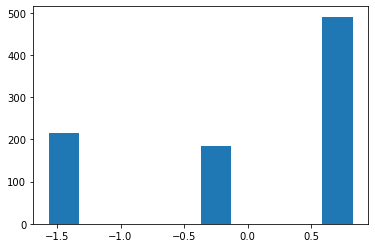

In [15]:
plt.hist(updatedDF[1])

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

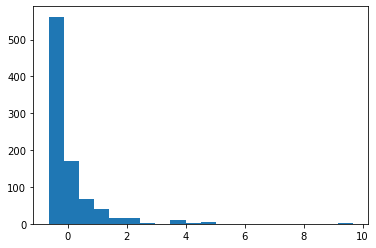

In [16]:
plt.hist(updatedDF[3],bins=20)

minmax scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

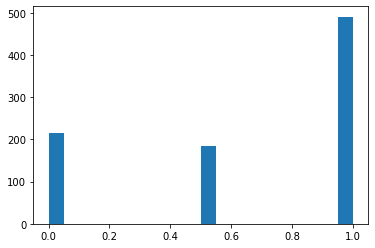

In [18]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

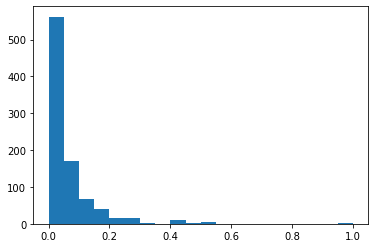

In [19]:
plt.hist(df_minmax['Fare'],bins=20)

##### Robust Scaler
It is used to scale the feature to median and quantiles.

Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

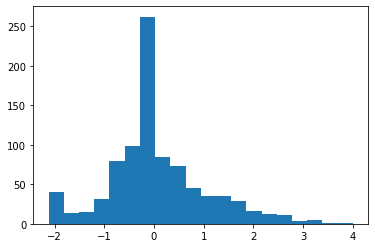

In [21]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

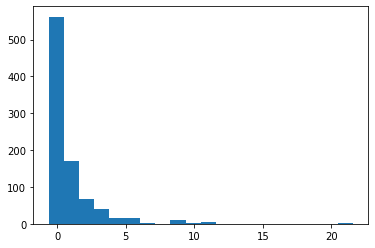

In [22]:
plt.hist(df_robust_scaler['Fare'],bins=20)

#### Guassian Transformation (Normal Distribuation)

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [23]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [27]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [28]:
import scipy.stats as stat
import pylab

In [29]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

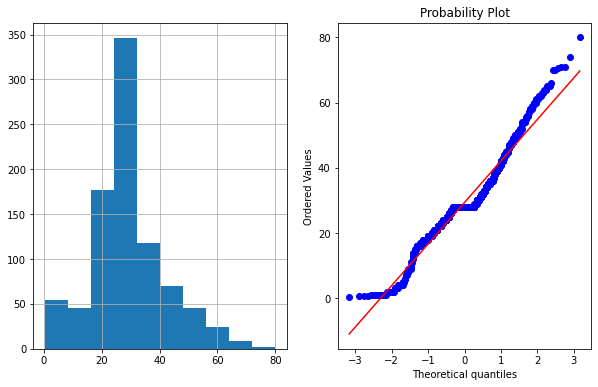

In [30]:
plot_data(df,'Age')

#### Logarithmic Transformation

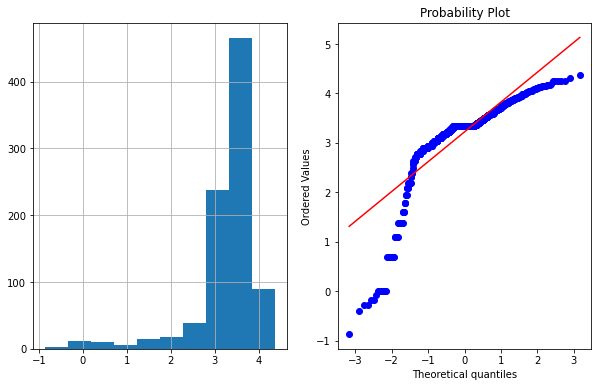

In [31]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

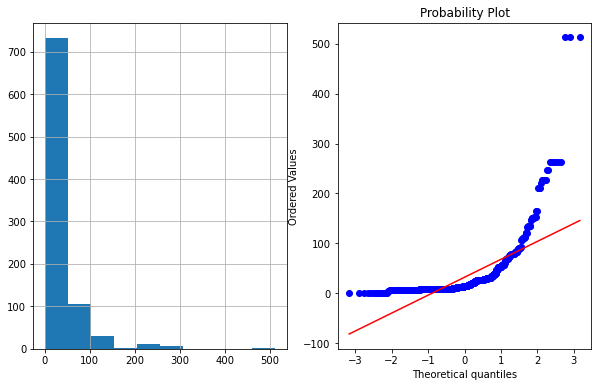

In [32]:
plot_data(df,'Fare')


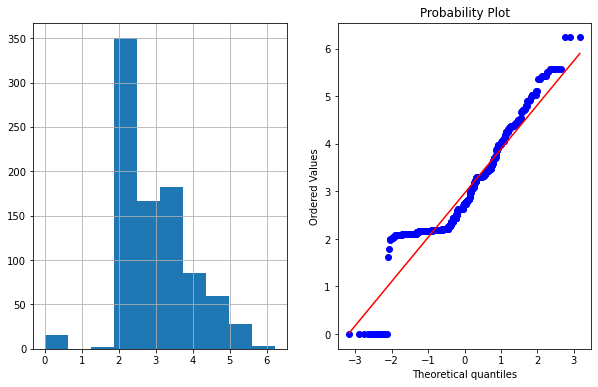

In [33]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')